## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [8]:
import os
import keras
import itertools
from keras.layers import Dropout
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
# same number of hidden layer with different dropout ratio
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.3, 0.5, 0.7]

In [14]:
results1 = {}
for drp_ratio in Dropout_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-drpRate-%s" % str(drp_ratio)
    results1[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)   

Epoch 46/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.1259 - accuracy: 0.5985 - val_loss: 1.2864 - val_accuracy: 0.5407
Epoch 47/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.1228 - accuracy: 0.6007 - val_loss: 1.2812 - val_accuracy: 0.5446
Epoch 48/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.1202 - accuracy: 0.5991 - val_loss: 1.3118 - val_accuracy: 0.5357
Epoch 49/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.1094 - accuracy: 0.6042 - val_loss: 1.2782 - val_accuracy: 0.5447
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.0981 - accuracy: 0.6099 - val_loss: 1.2874 - val_accuracy: 0.5454
Experiment with Regulizer = 0.300000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

Epoch 41/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3967 - accuracy: 0.5006 - val_loss: 1.3743 - val_accuracy: 0.5111
Epoch 42/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.3911 - accuracy: 0.5020 - val_loss: 1.3640 - val_accuracy: 0.5122
Epoch 43/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.3888 - accuracy: 0.5051 - val_loss: 1.3530 - val_accuracy: 0.5142
Epoch 44/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.3779 - accuracy: 0.5082 - val_loss: 1.3528 - val_accuracy: 0.5136
Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3738 - accuracy: 0.5113 - val_loss: 1.3437 - val_accuracy: 0.5162
Epoch 46/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3686 - accuracy: 0.5100 - val_loss: 1.3475 - val_accuracy: 0.5129
Epoch 47/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.3626 - accuracy: 0.5128

Epoch 36/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6506 - accuracy: 0.4081 - val_loss: 1.5169 - val_accuracy: 0.4641
Epoch 37/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6474 - accuracy: 0.4104 - val_loss: 1.5200 - val_accuracy: 0.4615
Epoch 38/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6424 - accuracy: 0.4103 - val_loss: 1.5126 - val_accuracy: 0.4635
Epoch 39/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6377 - accuracy: 0.4107 - val_loss: 1.5069 - val_accuracy: 0.4662
Epoch 40/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6348 - accuracy: 0.4167 - val_loss: 1.5009 - val_accuracy: 0.4693
Epoch 41/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6277 - accuracy: 0.4206 - val_loss: 1.4997 - val_accuracy: 0.4669
Epoch 42/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.6290 - accuracy: 0.4140

50000/50000 [==============================] - 7s 132us/step - loss: 2.0482 - accuracy: 0.2101 - val_loss: 2.0676 - val_accuracy: 0.2315
Epoch 28/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.0443 - accuracy: 0.2103 - val_loss: 2.0544 - val_accuracy: 0.2447
Epoch 29/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0459 - accuracy: 0.2093 - val_loss: 2.0904 - val_accuracy: 0.2201
Epoch 30/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0479 - accuracy: 0.2124 - val_loss: 2.0679 - val_accuracy: 0.2331
Epoch 31/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.0389 - accuracy: 0.2141 - val_loss: 2.0642 - val_accuracy: 0.2314
Epoch 32/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0360 - accuracy: 0.2158 - val_loss: 2.0918 - val_accuracy: 0.2194
Epoch 33/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0322 - accuracy: 0.2160 - val_loss:

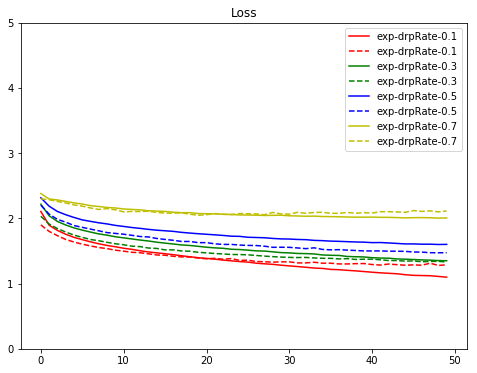

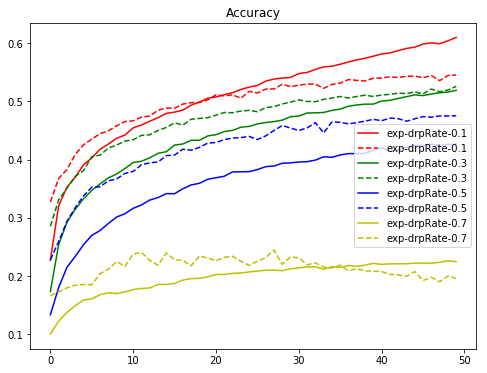

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

results = results1
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [16]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.1, 0.15, 0.2, 0.25, 0.3]

In [17]:
results2 = {}
for drp_ratio in Dropout_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-drpRate-%s" % str(drp_ratio)
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)   

Epoch 46/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.1673 - accuracy: 0.5788 - val_loss: 1.3446 - val_accuracy: 0.5297
Epoch 47/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.1589 - accuracy: 0.5837 - val_loss: 1.3338 - val_accuracy: 0.5345
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.1536 - accuracy: 0.5835 - val_loss: 1.3456 - val_accuracy: 0.5198
Epoch 49/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.1548 - accuracy: 0.5817 - val_loss: 1.3373 - val_accuracy: 0.5299
Epoch 50/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.1463 - accuracy: 0.5854 - val_loss: 1.3525 - val_accuracy: 0.5260
Experiment with Regulizer = 0.150000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

Epoch 41/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.3200 - accuracy: 0.5250 - val_loss: 1.3458 - val_accuracy: 0.5205
Epoch 42/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.3026 - accuracy: 0.5314 - val_loss: 1.3473 - val_accuracy: 0.5263
Epoch 43/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.3027 - accuracy: 0.5320 - val_loss: 1.3457 - val_accuracy: 0.5209
Epoch 44/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3014 - accuracy: 0.5312 - val_loss: 1.3591 - val_accuracy: 0.5208
Epoch 45/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.2904 - accuracy: 0.5339 - val_loss: 1.3402 - val_accuracy: 0.5230
Epoch 46/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2862 - accuracy: 0.5382 - val_loss: 1.3631 - val_accuracy: 0.5108
Epoch 47/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.2915 - accuracy: 0.5324

Epoch 36/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4200 - accuracy: 0.4878 - val_loss: 1.4144 - val_accuracy: 0.4992
Epoch 37/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4191 - accuracy: 0.4899 - val_loss: 1.4259 - val_accuracy: 0.4996
Epoch 38/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4134 - accuracy: 0.4938 - val_loss: 1.4063 - val_accuracy: 0.5005
Epoch 39/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4133 - accuracy: 0.4955 - val_loss: 1.4141 - val_accuracy: 0.5064
Epoch 40/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3998 - accuracy: 0.4968 - val_loss: 1.3935 - val_accuracy: 0.5105
Epoch 41/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.4011 - accuracy: 0.4959 - val_loss: 1.3823 - val_accuracy: 0.5092
Epoch 42/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.4009 - accuracy: 0.4981

Epoch 31/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5415 - accuracy: 0.4456 - val_loss: 1.4945 - val_accuracy: 0.4730
Epoch 32/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5375 - accuracy: 0.4478 - val_loss: 1.4832 - val_accuracy: 0.4849
Epoch 33/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5352 - accuracy: 0.4469 - val_loss: 1.4955 - val_accuracy: 0.4749
Epoch 34/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5287 - accuracy: 0.4510 - val_loss: 1.4902 - val_accuracy: 0.4728
Epoch 35/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5309 - accuracy: 0.4511 - val_loss: 1.4699 - val_accuracy: 0.4828
Epoch 36/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5258 - accuracy: 0.4538 - val_loss: 1.4804 - val_accuracy: 0.4774
Epoch 37/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.5243 - accuracy: 0.4513

Epoch 26/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6099 - accuracy: 0.4193 - val_loss: 1.5669 - val_accuracy: 0.4519
Epoch 27/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6275 - accuracy: 0.4122 - val_loss: 1.5360 - val_accuracy: 0.4608
Epoch 28/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6099 - accuracy: 0.4169 - val_loss: 1.5566 - val_accuracy: 0.4550
Epoch 29/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.6046 - accuracy: 0.4205 - val_loss: 1.5365 - val_accuracy: 0.4523
Epoch 30/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.6045 - accuracy: 0.4215 - val_loss: 1.5455 - val_accuracy: 0.4596
Epoch 31/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6044 - accuracy: 0.4174 - val_loss: 1.5408 - val_accuracy: 0.4494
Epoch 32/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5979 - accuracy: 0.4239

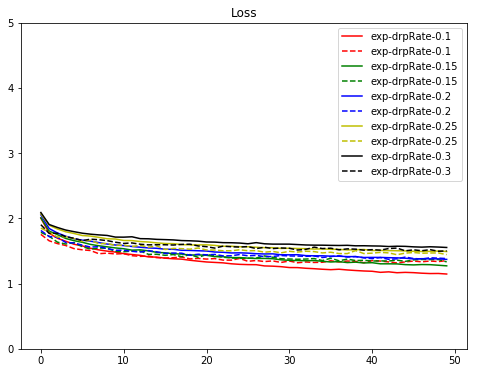

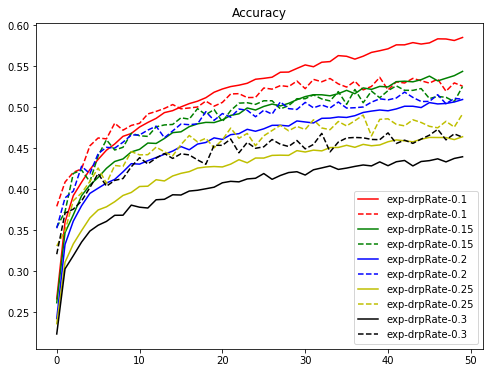

In [18]:
color_bar = ["r", "g", "b", "y", "k"]

results = results2
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 可再拉長epoch來看是否可減少overfitting的效果